In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# 읽기
df_reg = pd.read_excel(
    "/content/drive/MyDrive/data/CO2/자동차등록현황보고_자동차등록대수현황 시도별.xlsx"
)

# ---- 1) 상단 메타데이터 제거 ----
df_reg = df_reg.drop(index=[0,1,2]).reset_index(drop=True)

# ---- 2) 3행 + 4행 = 최종 컬럼명 생성 ----
header1 = df_reg.iloc[0].fillna('')
header2 = df_reg.iloc[1].fillna('')

# 열 방향으로 결합 (중요!)
new_cols = []
for h1, h2 in zip(header1, header2):
    if h1 == '' and h2 == '':
        new_cols.append('')
    elif h1 == '' and h2 != '':
        new_cols.append(h2)
    elif h1 != '' and h2 == '':
        new_cols.append(h1)
    else:
        new_cols.append(f"{h1}_{h2}")

df_reg.columns = new_cols

# ---- 3) 헤더 행 제거 ----
df_reg = df_reg.drop(index=[0,1]).reset_index(drop=True)

# ---- 4) 공백/중복 언더스코어 처리 ----
df_reg.columns = [col.replace("__", "_").strip("_") for col in df_reg.columns]
df_reg

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,월(Monthly)_월(Monthly),시도명_시도명,시군구_시군구,승용_관용,승용_자가용,승용_영업용,승용_계,승합_관용,승합_자가용,승합_영업용,...,화물_영업용,화물_계,특수_관용,특수_자가용,특수_영업용,특수_계,총계_관용,총계_자가용,총계_영업용,총계_계
0,2023-01,서울,강남구,154,"207,692","19,642","227,488",54,"4,112",587,...,"1,861","15,706",17,325,148,490,401,"225,798","22,238","248,437"
1,2023-01,서울,강동구,102,"128,422","5,111","133,635",43,"3,569",819,...,"2,465","14,961",6,188,225,419,310,"144,516","8,620","153,446"
2,2023-01,서울,강북구,103,"60,998","2,066","63,167",66,"2,411",716,...,"1,271","8,598",14,123,113,250,315,"70,727","4,166","75,208"
3,2023-01,서울,강서구,129,"167,350","11,195","178,674",48,"4,632","1,361",...,"4,224","21,462",16,359,259,634,357,"189,415","17,039","206,811"
4,2023-01,서울,관악구,91,"99,804","3,123","103,018",46,"3,334",300,...,"2,112","11,698",12,159,175,346,296,"112,736","5,710","118,742"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,2025-10,전북,전주시 덕진구,158,"149,663","3,011","152,832",99,"3,196",911,...,"2,612","21,613",14,593,407,"1,014",421,"172,303","6,941","179,665"
9203,2025-10,전북,전주시 완산구,348,"136,986","1,991","139,325",223,"2,853",541,...,"1,553","17,443",23,376,252,651,803,"155,896","4,337","161,036"
9204,2025-10,전북,정읍시,111,"41,758",614,"42,483",107,"1,474",197,...,912,"15,962",8,265,123,396,385,"58,388","1,846","60,619"
9205,2025-10,전북,진안군,110,"9,870",61,"10,041",52,384,94,...,107,"5,260",17,56,16,89,289,"15,353",278,"15,920"


등록된 자동차 수

In [ ]:
# 필요 컬럼만 선택
df_clean = df_reg[['월(Monthly)_월(Monthly)', '시도명_시도명', '시군구_시군구', '승용_자가용']].copy()

# 컬럼명 단순화
df_clean.columns = ['월', '시도명', '시군구', '승용_자가용']

# 자동차 등록대수 숫자형 변환 (콤마 제거)
df_clean['승용_자가용'] = (
    df_clean['승용_자가용']
    .astype(str)
    .replace({',':''}, regex=True)
    .replace('', '0')  # 혹시 빈값 있으면 0 처리
    .astype(int)
)
df_clean

,월,시도명,시군구,승용_자가용
0,2023-01,서울,강남구,207692
1,2023-01,서울,강동구,128422
2,2023-01,서울,강북구,60998
3,2023-01,서울,강서구,167350
4,2023-01,서울,관악구,99804
...,...,...,...,...
9202,2025-10,전북,전주시 덕진구,149663
9203,2025-10,전북,전주시 완산구,136986
9204,2025-10,전북,정읍시,41758
9205,2025-10,전북,진안군,9870


In [ ]:
# 서울만 필터링
df_seoul = df_clean[df_clean['시도명'] == '서울'].copy()

# 월별 등록대수 합계
df_seoul_month = df_seoul.groupby('월', as_index=False)['승용_자가용'].sum()

# 컬럼명 정리
df_seoul_month.columns = ['월', '서울_승용_자가용']

df_seoul_month

,월,서울_승용_자가용
0,2023-01,5272434
1,2023-02,5271876
2,2023-03,5277516
3,2023-04,5281902
4,2023-05,5283592
5,2023-06,5289334
6,2023-07,5293416
7,2023-08,5293500
8,2023-09,5299112
9,2023-10,5299200


In [ ]:
# 월 컬럼을 문자열로 변환 후 필터링
df_seoul_month = df_seoul_month[df_seoul_month['월'].astype(str).str.startswith(('2023', '2024'))]
df_seoul_month

,월,서울_승용_자가용
0,2023-01,5272434
1,2023-02,5271876
2,2023-03,5277516
3,2023-04,5281902
4,2023-05,5283592
5,2023-06,5289334
6,2023-07,5293416
7,2023-08,5293500
8,2023-09,5299112
9,2023-10,5299200


1일 평균 주행 수

In [ ]:
import pandas as pd

# 컬럼명 직접 지정
columns = ['용도별', '차종별', '연료별', '전국', '서울', '부산', '대구', '인천', '광주', '대전',
           '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

# 상단 설명행(0~3)을 건너뛰고 데이터 읽기
df_2023 = pd.read_excel('/content/drive/MyDrive/data/CO2/차종별 연료별 주행거리_2023.xls',
                        header=None, skiprows=4, names=columns)
df_2024 = pd.read_excel('/content/drive/MyDrive/data/CO2/차종별 연료별 주행거리_2024.xls',
                        header=None, skiprows=4, names=columns)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df_2023

,용도별,차종별,연료별,전국,서울,부산,대구,인천,광주,대전,...,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,전체,계,휘발유,28,25,28,27,30,27,26,...,30,28,28,28,29,28,33,28,29,36
1,전체,계,경유,42,37,44,42,41,42,42,...,43,43,38,42,41,41,43,41,42,41
2,전체,계,LPG,44,53,51,43,47,42,43,...,38,41,43,42,40,42,45,40,41,50
3,전체,계,기타연료,45,42,47,46,50,43,46,...,45,44,43,44,43,45,49,44,46,49
4,전체,승용차,계,33,30,33,32,35,32,31,...,35,32,33,33,33,33,39,33,34,42
5,전체,승용차,휘발유,28,25,28,27,30,27,26,...,30,28,28,28,29,28,33,28,29,36
6,전체,승용차,경유,36,31,36,35,36,35,35,...,40,36,37,37,37,37,43,37,38,44
7,전체,승용차,LPG,45,55,53,44,49,42,44,...,39,41,45,43,41,43,46,42,43,53
8,전체,승용차,기타연료,41,37,41,41,46,38,40,...,44,39,43,42,41,42,49,42,43,49
9,전체,승합차,계,54,52,53,54,49,48,52,...,51,59,49,55,56,53,54,53,55,50


In [ ]:
# 조건 필터링 후 서울 컬럼만 선택
df_2023_seoul = df_2023[
    (df_2023['차종별'] == '승용차') &
    (df_2023['연료별'] == '계')
][['서울']]

# 인덱스를 서울로 설정하고 싶으면
df_2023_seoul.index = ['서울']

# 조건 필터링 후 서울 컬럼만 선택
df_2024_seoul = df_2024[
    (df_2024['차종별'] == '승용차') &
    (df_2024['연료별'] == '계')
][['서울']]

# 인덱스를 서울로 설정하고 싶으면
df_2024_seoul.index = ['서울']

In [ ]:
# 2023년 이동량 계산
df_seoul_month['서울_이동량_2023'] = df_seoul_month['서울_승용_자가용'] * df_2023_seoul.loc['서울', '서울']

# 2024년 이동량 계산
df_seoul_month['서울_이동량_2024'] = df_seoul_month['서울_승용_자가용'] * df_2024_seoul.loc['서울', '서울']


/tmp/ipython-input-1078894256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_month['서울_이동량_2023'] = df_seoul_month['서울_승용_자가용'] * df_2023_seoul.loc['서울', '서울']
/tmp/ipython-input-1078894256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_month['서울_이동량_2024'] = df_seoul_month['서울_승용_자가용'] * df_2024_seoul.loc['서울', '서울']


In [ ]:
df_seoul_month

,월,서울_승용_자가용,서울_이동량_2023,서울_이동량_2024
0,2023-01,5272434,158173020,158173020
1,2023-02,5271876,158156280,158156280
2,2023-03,5277516,158325480,158325480
3,2023-04,5281902,158457060,158457060
4,2023-05,5283592,158507760,158507760
5,2023-06,5289334,158680020,158680020
6,2023-07,5293416,158802480,158802480
7,2023-08,5293500,158805000,158805000
8,2023-09,5299112,158973360,158973360
9,2023-10,5299200,158976000,158976000


In [ ]:
# 서울 이동량 계산 (연도에 맞게)
df_seoul_month['서울_이동량'] = df_seoul_month.apply(
    lambda row: row['서울_승용_자가용'] * df_2023_seoul.loc['서울', '서울']
    if str(row['월']).startswith('2023')
    else row['서울_승용_자가용'] * df_2024_seoul.loc['서울', '서울'],
    axis=1
)

# 필요 없는 컬럼 제거 (이미 없는 경우는 그냥 넘어감)
df_seoul_month = df_seoul_month[['월', '서울_승용_자가용', '서울_이동량']]

/tmp/ipython-input-2430962275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_month['서울_이동량'] = df_seoul_month.apply(


In [ ]:
df_seoul_month

,월,서울_승용_자가용,서울_이동량
0,2023-01,5272434,158173020
1,2023-02,5271876,158156280
2,2023-03,5277516,158325480
3,2023-04,5281902,158457060
4,2023-05,5283592,158507760
5,2023-06,5289334,158680020
6,2023-07,5293416,158802480
7,2023-08,5293500,158805000
8,2023-09,5299112,158973360
9,2023-10,5299200,158976000


연비

In [ ]:
file_path = "/content/drive/MyDrive/data/CO2/한국에너지공단_자동차 표시연비 정보_20250818.csv"

# UTF-8로 불러오기
df_fuel = pd.read_csv(file_path, encoding='utf-8')
df_fuel

,모델명,제조(수입사),차종,유형,복합_연비,1회충전주행거리,도심_연비,고속도로_연비,등급
0,베프(VEV),Luqi Intellgent Technology Co Ltd,화물차,일반형,6,67.0,5.9,6.2,초소형
1,MASADA QQ 2밴,체리자동차,화물차,밴형,6.3,100.0,6.4,6.1,초소형
2,CEVO-C SE 1인승 밴형,주식회사 쎄보모빌리티,승용차,일반형,6.3,69.0,6.7,5.8,초소형
3,포텐스,(주)진우에스엠씨,화물차,일반형,4.5,57.0,5.4,3.8,초소형
4,D2C(D2C13),쎄미시스코,화물차,화물,5.4,79.0,6,4.8,초소형
...,...,...,...,...,...,...,...,...,...
3988,"K7 2.4하이브리드 (17""타이어) (15)",기아,승용차,일반형,16.2,NaN,16.1,16.2,1등급
3989,니로 1.6GDI 하이브리드_18''타이어 (15),기아,승용차,기타형,17.1,NaN,17.7,16.4,1등급
3990,니로 1.6GDI 하이브리드_16''타이어 (15),기아,승용차,기타형,19.5,NaN,20.1,18.7,1등급
3991,아이오닉 1.6GDI 하이브리드 6DCT_17''타이어,현대,승용차,일반형,20.2,NaN,20.4,19.9,1등급


In [ ]:
# 승용차만 필터링
df_fuel_sedan = df_fuel[df_fuel['차종'] == '승용차']
# 복합_연비 숫자형으로 변환
df_fuel_sedan['복합_연비'] = pd.to_numeric(df_fuel_sedan['복합_연비'], errors='coerce')
# 평균 연비 계산
avg_fuel_efficiency = df_fuel_sedan['복합_연비'].mean()

/tmp/ipython-input-3990663504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuel_sedan['복합_연비'] = pd.to_numeric(df_fuel_sedan['복합_연비'], errors='coerce')


In [ ]:
# 서울 연료 소모량 계산 (L)
df_seoul_month['서울_연료소모량'] = df_seoul_month['서울_이동량'] / avg_fuel_efficiency

/tmp/ipython-input-2910215431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_month['서울_연료소모량'] = df_seoul_month['서울_이동량'] / avg_fuel_efficiency


In [ ]:
# CO2 배출 계수 (kg CO2 per liter)
CO2_per_liter_avg = (2.31 + 2.68 + 1.51) / 3

# 서울 승용차 CO2 배출량 계산
df_seoul_month['승용_자가용_CO2_kg'] = df_seoul_month['서울_연료소모량'] * CO2_per_liter_avg
df_seoul_month

,월,서울_승용_자가용,서울_이동량,서울_연료소모량,승용_자가용_CO2_kg
0,2023-01,5272434,158173020,1.540254e+07,3.337217e+07
1,2023-02,5271876,158156280,1.540091e+07,3.336863e+07
2,2023-03,5277516,158325480,1.541738e+07,3.340433e+07
3,2023-04,5281902,158457060,1.543020e+07,3.343209e+07
4,2023-05,5283592,158507760,1.543513e+07,3.344279e+07
5,2023-06,5289334,158680020,1.545191e+07,3.347913e+07
6,2023-07,5293416,158802480,1.546383e+07,3.350497e+07
7,2023-08,5293500,158805000,1.546408e+07,3.350550e+07
8,2023-09,5299112,158973360,1.548047e+07,3.354102e+07
9,2023-10,5299200,158976000,1.548073e+07,3.354158e+07


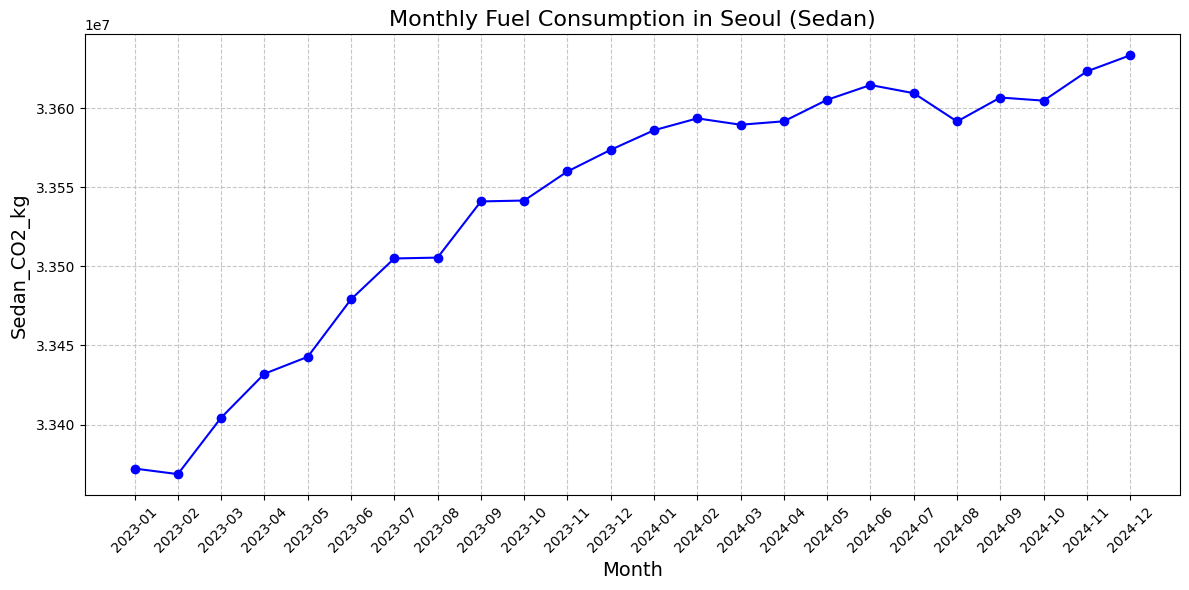

In [ ]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(df_seoul_month['월'], df_seoul_month['승용_자가용_CO2_kg'], marker='o', color='blue')

# 제목과 축 라벨 영어로 설정
plt.title('Monthly Fuel Consumption in Seoul (Sedan)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sedan_CO2_kg', fontsize=14)

# x축 레이블 회전 (보기 좋게)
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
!pip install prophet statsmodels tensorflow

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us


📌 6개월 예측 결과 비교표
          날짜     Baseline        ARIMA       SARIMA      Prophet        LSTM
0 2025-01-01  33633411.14  33633410.08  33633410.08  33632545.06  33626916.0
1 2025-02-01  33633411.14  33633410.08  33633410.08  33638603.82  33634120.0
2 2025-03-01  33633411.14  33633410.08  33633410.08  33644076.24  33637528.0
3 2025-04-01  33633411.14  33633410.08  33633410.08  33650135.00  33638264.0
4 2025-05-01  33633411.14  33633410.08  33633410.08  33655998.31  33641824.0
5 2025-06-01  33633411.14  33633410.08  33633410.08  33662057.07  33644040.0


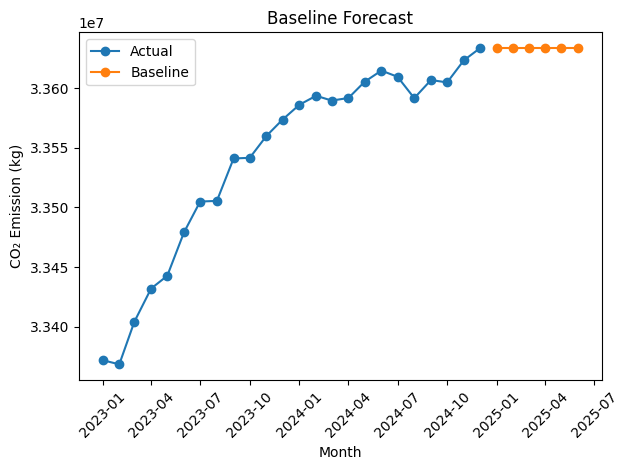

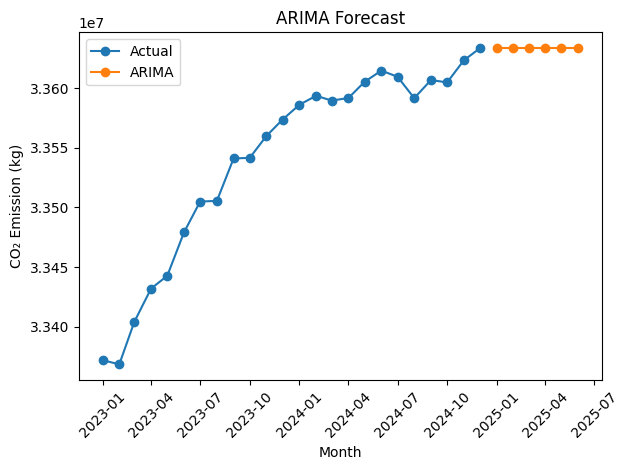

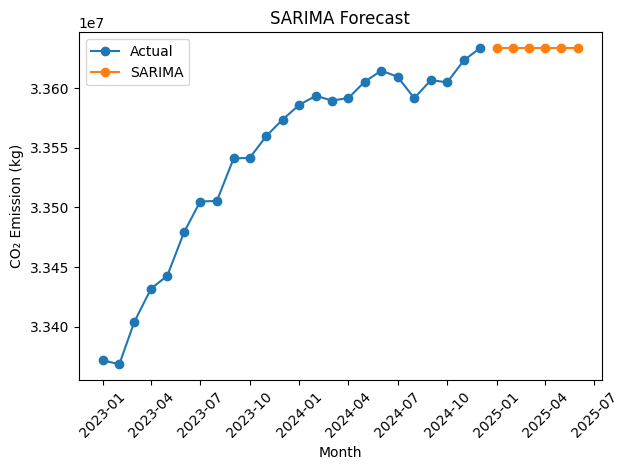

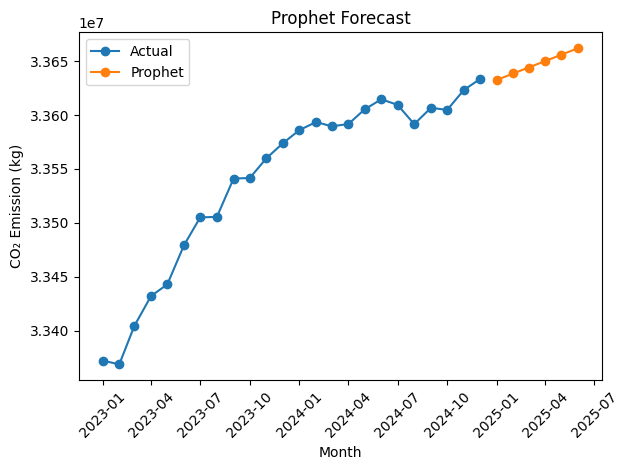

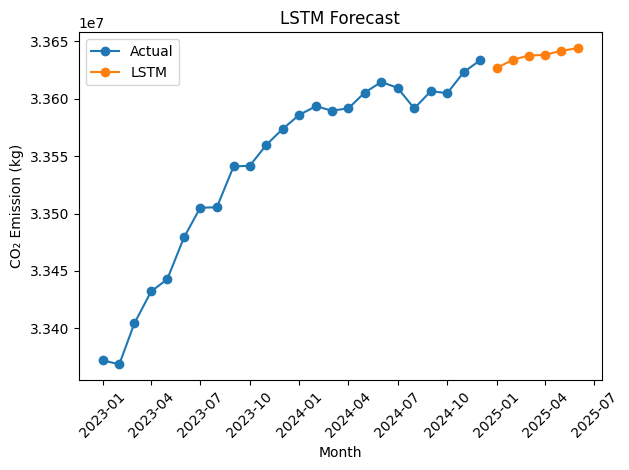

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ==========================================
# 1. 데이터 준비
# ==========================================
df = df_seoul_month.copy()
df['월'] = pd.to_datetime(df['월'])
df = df.set_index('월')
ts = df['승용_자가용_CO2_kg']

forecast_steps = 6
future_index = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(),
                             periods=forecast_steps, freq='MS')

# ==========================================
# 2. Baseline Naive
# ==========================================
baseline_fc = np.repeat(ts.iloc[-1], forecast_steps)

# ==========================================
# 3. ARIMA
# ==========================================
arima_fit = ARIMA(ts, order=(1,1,1)).fit()
arima_fc = arima_fit.forecast(steps=forecast_steps)

# ==========================================
# 4. SARIMA  ← 계절성 제거하여 안정화
# ==========================================
sarima_fit = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,0,0,12)).fit()
sarima_fc = sarima_fit.forecast(steps=forecast_steps)

# ==========================================
# 5. Prophet
# ==========================================
df_prophet = ts.reset_index()
df_prophet.columns = ["ds", "y"]

prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=forecast_steps, freq="MS")
prophet_pred = prophet_model.predict(future)
prophet_fc = prophet_pred[['ds', 'yhat']].tail(forecast_steps)
prophet_fc.set_index("ds", inplace=True)

# ==========================================
# 6. LSTM (시퀀스 기반 딥러닝)
# ==========================================
values = ts.values.reshape(-1,1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

# 데이터 윈도우 생성
def create_window(data, size=3):
    X, y = [], []
    for i in range(len(data)-size):
        X.append(data[i:i+size])
        y.append(data[i+size])
    return np.array(X), np.array(y)

window = 3
X, y = create_window(scaled, window)
X = X.reshape((X.shape[0], window, 1))

model_lstm = Sequential([
    LSTM(32, activation='relu', input_shape=(window,1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X, y, epochs=300, verbose=0)

# 미래 예측
cur = scaled[-window:]
lstm_preds = []
for _ in range(forecast_steps):
    pred = model_lstm.predict(cur.reshape(1, window, 1), verbose=0)[0][0]
    lstm_preds.append(pred)
    cur = np.append(cur[1:], pred)

lstm_fc = scaler.inverse_transform(np.array(lstm_preds).reshape(-1,1)).flatten()

# ==========================================
# 7. 결과 통합
# ==========================================
forecast_df = pd.DataFrame({
    "날짜": future_index,
    "Baseline": baseline_fc,
    "ARIMA": arima_fc.values,
    "SARIMA": sarima_fc.values,
    "Prophet": prophet_fc['yhat'].values,
    "LSTM": lstm_fc
}).round(2)

print("\n📌 6개월 예측 결과 비교표")
print(forecast_df)

# ==========================================
# 8. 모델별 개별 시각화 (축 깨짐 방지)
# ==========================================
models = {
    "Baseline": baseline_fc,
    "ARIMA": arima_fc.values,
    "SARIMA": sarima_fc.values,
    "Prophet": prophet_fc['yhat'].values,
    "LSTM": lstm_fc
}

for name, pred in models.items():
    plt.figure()
    plt.plot(ts.index, ts.values, marker='o', label="Actual")
    plt.plot(future_index, pred, marker='o', label=name)
    plt.title(f"{name} Forecast")
    plt.xlabel("Month"); plt.ylabel("CO₂ Emission (kg)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()